# Importando librerías

In [0]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.callbacks import TensorBoard
from time import time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import ReLU
import imageio

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ploteando imágenes de ejemplo

In [0]:

img = imageio.imread('/content/drive/My Drive/chest-xray-resized/train/NORMAL/IM-0115-0001.jpeg', as_gray=True)
img2=imageio.imread('/content/drive/My Drive/chest-xray-resized/train/PNEUMONIA/person1000_bacteria_2931.jpeg', as_gray=True)

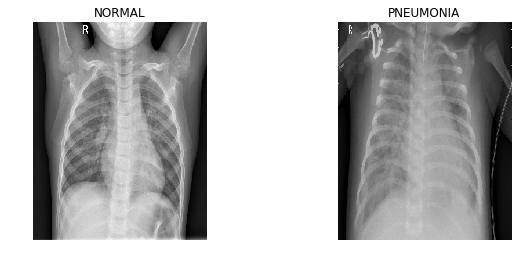

In [102]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('NORMAL')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title('PNEUMONIA')
pylab.show()

In [0]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [0]:
normaltrain=0
pneumoniatrain=0
for i in range(len(train)):
  for e in train[i][1]:
    if e[0]==1:
      pneumoniatrain+=1
    else: normaltrain+=1
normaltest=0
pneumoniatest=0
for i in range(len(test)):
  for e in test[i][1]:
    if e[0]==1:
      pneumoniatest+=1
    else: normaltest+=1     
normalval=0
pneumoniaval=0
for i in range(len(val)):
  for e in val[i][1]:
    if e[0]==1:
      pneumoniaval+=1
    else: normalval+=1


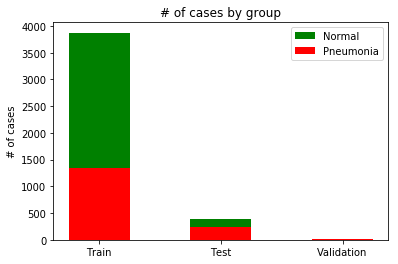

In [113]:
N = 3
normal=(normaltrain,normaltest,normalval)
pneumonia=(pneumoniatrain,pneumoniatest,pneumoniaval)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, normal, width,color='g')
p2 = plt.bar(ind, pneumonia, width, color='r')

plt.ylabel('# of cases')
plt.title('# of cases by group')
plt.xticks(ind, ('Train', 'Test', 'Validation'))
plt.yticks(np.arange(0, 4500, 500))
plt.legend((p1[0], p2[0]), ('Normal', 'Pneumonia'))

plt.show()

# Set train,test and validate generators

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [82]:
train = datagen.flow_from_directory('/content/drive/My Drive/chest-xray-resized/train/', target_size=(300, 375), color_mode='grayscale',batch_size=128)
test = datagen.flow_from_directory('/content/drive/My Drive/chest-xray-resized/test/', target_size=(300, 375), color_mode='grayscale',batch_size=128)
val = datagen.flow_from_directory('/content/drive/My Drive/chest-xray-resized/val/', target_size=(300, 375), color_mode='grayscale',batch_size=128)


Found 5224 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
validation = datagen.flow_from_directory('/content/drive/My Drive/chest-xray-resized/validation/', target_size=(300, 375), color_mode='grayscale', batch_size=450)

Found 300 images belonging to 2 classes.


In [103]:
train.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# Define CNN

In [84]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(300, 375,1), activation='relu'))
model.add(Conv2D(32,(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',  # we train 2-way classification
    optimizer=keras.optimizers.Adadelta(),  # for SGD
    metrics=['accuracy'],  # report accuracy during training
    #shuffle=True,
    #verbose=1
)
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train,steps_per_epoch=len(train), epochs=10)#,callbacks=[tensorboard])#,
                   #validation_data = validation,validation_steps=len(validation))#, batch_size=32)

Epoch 1/10
41/41 [==============================] - 73s 2s/step - loss: 0.6699 - acc: 0.7204
Epoch 2/10
41/41 [==============================] - 54s 1s/step - loss: 0.5634 - acc: 0.7376
Epoch 3/10
41/41 [==============================] - 54s 1s/step - loss: 0.4822 - acc: 0.7623
Epoch 4/10
41/41 [==============================] - 54s 1s/step - loss: 0.3943 - acc: 0.8278
Epoch 5/10
41/41 [==============================] - 54s 1s/step - loss: 0.2677 - acc: 0.9044
Epoch 6/10
41/41 [==============================] - 54s 1s/step - loss: 0.2039 - acc: 0.9245
Epoch 7/10
41/41 [==============================] - 54s 1s/step - loss: 0.2013 - acc: 0.9226
Epoch 8/10
41/41 [==============================] - 54s 1s/step - loss: 0.1785 - acc: 0.9368
Epoch 9/10
41/41 [==============================] - 53s 1s/step - loss: 0.1594 - acc: 0.9369
Epoch 10/10
41/41 [==============================] - 53s 1s/step - loss: 0.1461 - acc: 0.9494


In [83]:
val_loss,val_acc = model.evaluate_generator(test,steps=len(val))
print(val_loss,val_acc)

5.22165060043335 0.671875


In [0]:
predictions=model.predict_generator(test,steps=len(test))

In [79]:
print(predictions[0],np.argmax(predictions[0]))
#print(test,np.argmax(test))

[3.2836985e-34 1.0000000e+00] 1


In [57]:
print(len(predictions))

624


In [58]:
predictions[0]

array([4.1390386e-30, 1.0000000e+00], dtype=float32)